# Generating Dataset

In [1]:
import cv2
import os
import numpy as np

#### Run Only if u want to generate dataset

In [2]:
def generate_dataset():
    harcascadePath = 'haarcascade_frontalface_default.xml'
    face_classifier = cv2.CascadeClassifier(harcascadePath)
    user = input("Enter Name : ")
    os.mkdir("data//train//"+user)
    os.mkdir("data//test//"+user)
    os.mkdir("data//validation//"+user)
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cam = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret,frame = cam.read()
        
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
            if (img_id<=600):
                file_name_path = "data//train//" +user+ "//"+ user+ "." + str(img_id) + ".jpg"
            elif (img_id>600 and img_id<=800):
                file_name_path = "data//validation//" +user+ "//"+ user+ "." + str(img_id) + ".jpg"
            else :
                file_name_path = "data//test//" +user+ "//"+ user+ "." + str(img_id) + ".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
        
            cv2.imshow("Cropped Face",face)
        if cv2.waitKey(1)==13 or int(img_id)==1000:
             break
    
    cam.release()
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("Sample Collection Completed !!!")

generate_dataset();

Enter Name : Sahil
Sample Collection Completed !!!


## Dataset Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [5]:
train_path = "data//train//"
validation_path = "data//validation//"
test_path = "data//test//"

In [6]:
image_gen.flow_from_directory(train_path)

Found 3000 images belonging to 5 classes.


In [7]:
image_gen.flow_from_directory(validation_path)

Found 1000 images belonging to 5 classes.


In [8]:
image_gen.flow_from_directory(test_path)

Found 1000 images belonging to 5 classes.


# Creating Model 

In [9]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(200,200,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(200,200,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(200,200,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64)) 
model.add(Activation('relu'))

model.add(Dropout(0.8))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
earlystop = EarlyStopping(monitor = 'loss', 
                          min_delta = 0, 
                          patience = 2,
                          verbose = 1,
                          restore_best_weights = True)


callbacks = [earlystop]

In [14]:
batch_size = 32
image_shape=(200,200)

In [15]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3000 images belonging to 5 classes.


In [16]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 1000 images belonging to 5 classes.


In [17]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 1000 images belonging to 5 classes.


In [18]:
train_image_gen.class_indices

{'Aayush': 0, 'Kusham': 1, 'Riya': 2, 'Sahil': 3, 'Yuvraj': 4}

In [155]:
results = model.fit_generator(train_image_gen,epochs=15,
                              validation_data=validation_image_gen,
                              callbacks=callbacks
                             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 94 steps, validate for 32 steps
Epoch 1/15
94/94 [==============================] - 77s 822ms/step - loss: 1.4464 - accuracy: 0.2997 - val_loss: 1.0574 - val_accuracy: 0.4780
Epoch 2/15
94/94 [==============================] - 75s 793ms/step - loss: 1.0194 - accuracy: 0.5677 - val_loss: 0.4458 - val_accuracy: 0.9080
Epoch 3/15
94/94 [==============================] - 77s 820ms/step - loss: 0.7280 - accuracy: 0.7373 - val_loss: 0.2896 - val_accuracy: 0.9030
Epoch 4/15
94/94 [==============================] - 78s 833ms/step - loss: 0.5258 - accuracy: 0.8013 - val_loss: 0.1302 - val_accuracy: 0.9460
Epoch 5/15
94/94 [==============================] - 82s 873ms/step - loss: 0.4034 - accuracy: 0.8433 - val_loss: 0.2498 - val_accuracy: 0.9070
Epoch 6/15
94/94 [==============================] - 79s 842ms/step - loss: 0.3553 - accuracy: 0.8563 - val_loss: 0.1998 - val_accuracy: 0.9320
Epoch 7/15
94/94 [==============================] 

In [19]:
from tensorflow.keras.models import load_model
#model.save('Face Recognition 13.h5')
model=load_model('Face Recognition 13.h5')

# Model evaluation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
losses = pd.DataFrame(model.history.history)

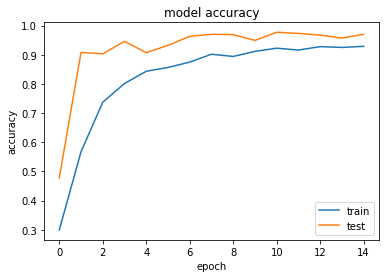

In [163]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='BOTTOM RIGHT')
plt.show()

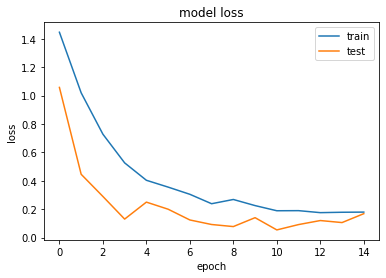

In [164]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='TOP RIGHT')
plt.show()

In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.12778759041539045, 0.968]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
pred_classes = model.predict_classes(test_image_gen,batch_size= None)

In [25]:
pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [27]:
cnf_matrix=confusion_matrix(test_image_gen.classes,pred_classes)
cnf_matrix

array([[200,   0,   0,   0,   0],
       [  0, 194,   3,   3,   0],
       [  0,   0, 200,   0,   0],
       [  1,  15,   1, 183,   0],
       [  0,   0,   0,   0, 200]], dtype=int64)

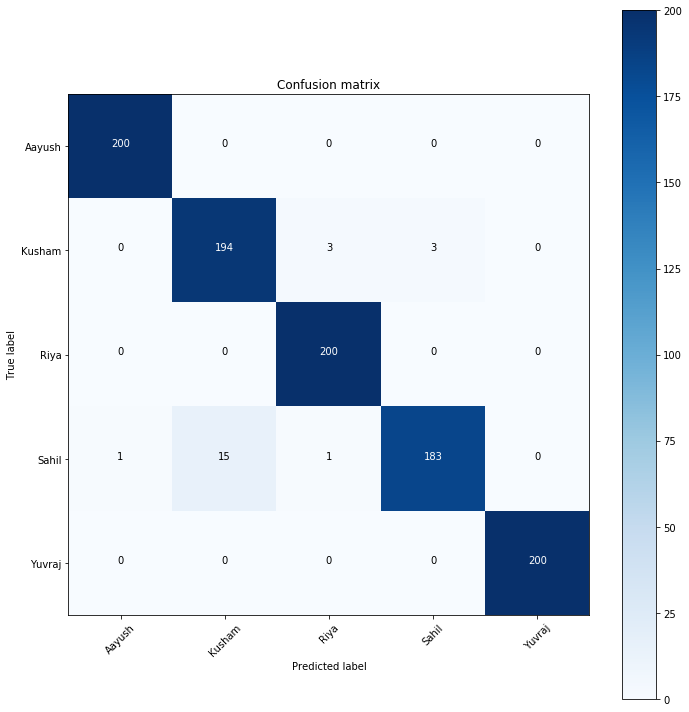

In [28]:
plot_confusion_matrix(cnf_matrix, 
                      classes=train_image_gen.class_indices.keys(),
                      normalize=False,
                      title='Confusion matrix')

In [29]:
Acc = accuracy_score(test_image_gen.classes,pred_classes)
print("Accouracy : ",Acc*100,"%")

Accouracy :  97.7 %


In [30]:
print(classification_report(test_image_gen.classes,pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.93      0.97      0.95       200
           2       0.98      1.00      0.99       200
           3       0.98      0.92      0.95       200
           4       1.00      1.00      1.00       200

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [31]:
df=test_image_gen.class_indices
df

{'Aayush': 0, 'Kusham': 1, 'Riya': 2, 'Sahil': 3, 'Yuvraj': 4}

In [32]:
keys=df.keys()
keys=list(keys)
keys=pd.DataFrame(keys)
keys.rename(columns={0:'Classes'})

,Classes
0,Aayush
1,Kusham
2,Riya
3,Sahil
4,Yuvraj


# Predictions

In [43]:
pwd

'D:\\python\\Minor Project MTech'

In [47]:
img = 'D:\\python\\Minor Project MTech\\data\\my pic.jpeg' #pic.jpg
#img = 'D:\\python\\Minor Project MTech\\data\\test\\Aayush\\Aayush.805.jpg'/

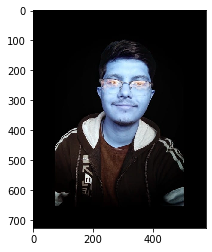

In [48]:
img = cv2.imread(img)
plt.imshow(img)
#img = cv2.resize(img,(600,600))
#cv2.imshow("Image",img)

In [49]:
cropped_face=img

In [50]:
harcascadePath = 'haarcascade_frontalface_default.xml'
face_classifier = cv2.CascadeClassifier(harcascadePath)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,5)
        
if faces is ():
    print("Not Found")
for (x,y,w,h) in faces:
    cropped_face = img[y:y+h,x:x+w]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

img = cv2.resize(img,(600,600))
#cv2.imshow("Result",img)
#cv2.waitKey(0);

In [51]:
cropped_face = cv2.resize(cropped_face,(200,200))
#cv2.imshow("Crop",cropped_face)
#cv2.waitKey(0);

In [52]:
cropped_face.shape

(200, 200, 3)

In [53]:
cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGB2GRAY)

In [54]:
cropped_face =  np.expand_dims(cropped_face, axis=0)

In [55]:
cropped_face.shape

(1, 200, 200)

In [56]:
cropped_face =  np.expand_dims(cropped_face, axis=-1)

In [57]:
cropped_face.shape

(1, 200, 200, 1)

In [58]:
#value = model.predict_classes(cropped_face)
value = np.argmax(model.predict(cropped_face),axis=1)

In [59]:
Predicted_class = keys[0][int(value)]
Predicted_class

'Sahil'

# Video Prediction

In [60]:
import imutils
import time
from datetime import datetime,date

In [73]:
vs = cv2.VideoCapture(0)
time.sleep(5.0)
harcascadePath = 'haarcascade_frontalface_default.xml'
face_classifier = cv2.CascadeClassifier(harcascadePath)
count=0
previous_detect=""
Face_recog=[]

while True:
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    today = date.today()
    today = today.strftime("%d %B, %Y")
    ret,frame = vs.read()
    frame = imutils.resize(frame, width=1200)
    cv2.rectangle(frame, (8,50), (150, 85), (0,0,0), -1)    
    cv2.rectangle(frame, (860,50), (1500, 90), (0,0,0), -1)
    cv2.putText(frame, str(current_time), (10,80), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, str(today), (860,80), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    for (x, y, w, h) in faces:
        cropped_face = frame[y:y+h,x:x+w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cropped_face = cv2.resize(cropped_face,(200,200))
        cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGB2GRAY)
        cropped_face =  np.expand_dims(cropped_face, axis=0)
        cropped_face =  np.expand_dims(cropped_face, axis=-1)
        #value = model.predict_classes(cropped_face)
        value = np.argmax(model.predict(cropped_face),axis=1)
        Predicted_class = keys[0][int(value)]
        cv2.rectangle(frame, (x-1, y+h+1), (x + w, y+h+40), (0, 255, 0), -1)
        cv2.putText(frame, Predicted_class, (x+10,y+h+30), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
        if Predicted_class == previous_detect:
            count+=1
        else:
            count=0
            previous_detect = Predicted_class
            
        if count==20:
            if (Predicted_class not in Face_recog):
                print(Predicted_class,"@",current_time,"@",today)
                Face_recog.append(Predicted_class)
    cv2.imshow("Face Cam", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q") or key == ord("Q") or key==13:
        break
vs.release()
cv2.destroyAllWindows()

Sahil @ 20:58:21 @ 20 December, 2021
Aayush @ 20:57:20 @ 20 December, 2021
Riya @ 21:00:28 @ 20 December, 2021


# Attendance

In [96]:
Attendance_df = pd.read_csv("D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv")
today = date.today()
today = today.strftime("%d-%b-%y")
present=[]
i=0
for name in Attendance_df['Name']:
    if name in Face_recog:
        present.append(1)
    else :
        present.append(0)
if today not in Attendance_df.columns:
    today = date.today()
    today = today.strftime("%d-%b-%Y")
    df=pd.DataFrame({today : present})
    result = pd.concat([Attendance_df.iloc[:,:-2],df,Attendance_df.iloc[:,-2:]], axis=1, join='inner')
    result['Total Attendance'] = result.iloc[:,3:-2].sum(axis=1)
    result['Attendance Percentage'] = round(result['Total Attendance']/(len(result.columns)-5)*100,2)
    result.to_csv ('D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv', index = False, header=True)
    display(result)
else:
    for n in present:
        if(n==1):
            Attendance_df[today][i]=1
        i+=1
    Attendance_df['Total Attendance'] = Attendance_df.iloc[:,3:-2].sum(axis=1)
    Attendance_df['Attendance Percentage'] = round(Attendance_df['Total Attendance']/(len(Attendance_df.columns)-5)*100,2)
    Attendance_df.to_csv ('D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv', index = False, header=True)
    display(Attendance_df)

,Roll No.,Name,Email,16-Dec-21,17-Dec-21,18-Dec-21,20-Dec-2021,Total Attendance,Attendance Percentage
0,101,Aayush,kpssahiljasrotia@gmail.com,1,0,1,1,3,75.0
1,102,Kusham,kpssahiljasrotia@gmail.com,1,1,0,0,2,50.0
2,103,Riya,kpssahiljasrotia@gmail.com,0,0,0,1,1,25.0
3,104,Sahil,kpssahiljasrotia@gmail.com,1,1,1,1,4,100.0
4,105,Yuvraj,kpssahiljasrotia@gmail.com,0,1,1,0,2,50.0


# Email Notifications

In [70]:
#imports required
import yagmail
import warnings
warnings.filterwarnings('ignore')

### i) Sending CSV File

In [71]:
receiver = "kpssahiljasrotia@gmail.com"
body = "Please find the attanchment of attendance record upto "+today
filename = "D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv"

yag = yagmail.SMTP("cocsahiljasrotia@gmail.com")
yag.send(
    to=receiver,
    subject="Class Attendance",
    contents=body, 
     attachments=filename  
)

print(f"Attendance CSV file forwarded to teacher")

Attendance CSV file forwarded to teacher


### ii) Sending Email Notifications to Absentees' Parents

In [72]:
i=0
for presence in Attendance_df[today]:
    if(presence==0):
        Name = Attendance_df['Name'][i]
        receiver = Attendance_df['Email'][i]
        Percentage = Attendance_df['Attendance Percentage'][i]
        body = f"Your ward {Name} was absent from today's lecture. \n\n {Name}'s current attendance is {Percentage}%. \n\n Please be concerned regarding your child's attendance as we will not be able to consider any excuse if he/she failed to maintain the minimum criteria."

        yag = yagmail.SMTP("cocsahiljasrotia@gmail.com")
        yag.send(
            to=receiver,
            subject=f"Attendance of {Name}",
            contents=body
        )
        
        print(f"Absence reported to {Name}'s Parents.")

    i+=1

Absence reported to Kusham's Parents.
Absence reported to Yuvraj's Parents.
